In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
df2 = pd.read_csv("test.csv")
df2.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."
2,"35;""management"";""single"";""tertiary"";""no"";1350;..."
3,"30;""management"";""married"";""tertiary"";""no"";1476..."
4,"59;""blue-collar"";""married"";""secondary"";""no"";0;..."


In [3]:
headers2 = []
for title in df2:
    title = title.split(';')
    for each in title:
        headers2.append(each)

print(headers2)

['age', '"job"', '"marital"', '"education"', '"default"', '"balance"', '"housing"', '"loan"', '"contact"', '"day"', '"month"', '"duration"', '"campaign"', '"pdays"', '"previous"', '"poutcome"', '"y"']


In [4]:
age = []
job = []
marital = []
education = []
default_rate = []
balance = []
housing = []
loan = []
contact = []
day = []
month = []
duration = []
campaign = []
pdays = []
previous = []
poutcome = []
y = []

for index, row in df2.iterrows():
    rows = row[0].split(";")
    age.append( rows[0] )
    job.append(rows[1])
    marital.append(rows[2])
    education.append(rows[3])
    default_rate.append(rows[4])
    balance.append(rows[5])
    housing.append(rows[6])
    loan.append(rows[7])
    contact.append(rows[8])
    day.append(rows[9])
    month.append(rows[10])
    duration.append(rows[11])
    campaign.append(rows[12])
    pdays.append(rows[13])
    previous.append(rows[14])
    poutcome.append(rows[15])
    y.append(rows[16])

/var/folders/m6/xg_6lhyd4qv9ff90vwlb1z_h0000gn/T/ipykernel_3766/2097374270.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rows = row[0].split(";")


In [5]:
dataset = {}
dataset["age"] = age 
dataset["job"] = job
dataset["marital"] = marital 
dataset["education"] = education
dataset["default_rate"] = default_rate
dataset["balance"] = balance 
dataset["housing"] = housing 
dataset["loan"] = loan 
dataset["contact"] = contact 
dataset["day"] = day 
dataset["month"] = month 
dataset["duration"] = duration 
dataset["campaign"] = campaign 
dataset["pdays"] = pdays 
dataset["previous"] = previous 
dataset["poutcome"] = poutcome 
dataset["y"] = y

In [6]:
dataset = pd.DataFrame(dataset)

In [7]:
dataset['outcome_num'] = 0
dataset.head(4)

,age,job,marital,education,default_rate,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,outcome_num
0,30,"""unemployed""","""married""","""primary""","""no""",1787,"""no""","""no""","""cellular""",19,"""oct""",79,1,-1,0,"""unknown""","""no""",0
1,33,"""services""","""married""","""secondary""","""no""",4789,"""yes""","""yes""","""cellular""",11,"""may""",220,1,339,4,"""failure""","""no""",0
2,35,"""management""","""single""","""tertiary""","""no""",1350,"""yes""","""no""","""cellular""",16,"""apr""",185,1,330,1,"""failure""","""no""",0
3,30,"""management""","""married""","""tertiary""","""no""",1476,"""yes""","""yes""","""unknown""",3,"""jun""",199,4,-1,0,"""unknown""","""no""",0


In [8]:
# One hot encoding 
dataset.loc[dataset['y'] == 'yes', 'outcome_num'] = 1 
dataset.loc[dataset['y'] == 'no', 'outcome_num'] = 0

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           4521 non-null   object
 1   job           4521 non-null   object
 2   marital       4521 non-null   object
 3   education     4521 non-null   object
 4   default_rate  4521 non-null   object
 5   balance       4521 non-null   object
 6   housing       4521 non-null   object
 7   loan          4521 non-null   object
 8   contact       4521 non-null   object
 9   day           4521 non-null   object
 10  month         4521 non-null   object
 11  duration      4521 non-null   object
 12  campaign      4521 non-null   object
 13  pdays         4521 non-null   object
 14  previous      4521 non-null   object
 15  poutcome      4521 non-null   object
 16  y             4521 non-null   object
 17  outcome_num   4521 non-null   int64 
dtypes: int64(1), object(17)
memory usage: 635.9+ KB


In [10]:
dataset['age'] = dataset['age'].astype(float)
dataset['balance'] = dataset['balance'].astype(float)

In [11]:
dataset.head()

,age,job,marital,education,default_rate,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,outcome_num
0,30.0,"""unemployed""","""married""","""primary""","""no""",1787.0,"""no""","""no""","""cellular""",19,"""oct""",79,1,-1,0,"""unknown""","""no""",0
1,33.0,"""services""","""married""","""secondary""","""no""",4789.0,"""yes""","""yes""","""cellular""",11,"""may""",220,1,339,4,"""failure""","""no""",0
2,35.0,"""management""","""single""","""tertiary""","""no""",1350.0,"""yes""","""no""","""cellular""",16,"""apr""",185,1,330,1,"""failure""","""no""",0
3,30.0,"""management""","""married""","""tertiary""","""no""",1476.0,"""yes""","""yes""","""unknown""",3,"""jun""",199,4,-1,0,"""unknown""","""no""",0
4,59.0,"""blue-collar""","""married""","""secondary""","""no""",0.0,"""yes""","""no""","""unknown""",5,"""may""",226,1,-1,0,"""unknown""","""no""",0


In [12]:
dataset.describe()

,age,balance,outcome_num
count,4521.000000,4521.000000,4521.0
mean,41.170095,1422.657819,0.0
std,10.576211,3009.638142,0.0
min,19.000000,-3313.000000,0.0
25%,33.000000,69.000000,0.0
50%,39.000000,444.000000,0.0
75%,49.000000,1480.000000,0.0
max,87.000000,71188.000000,0.0


In [13]:
# Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(dataset[["age", "balance"]], dataset['y'] , test_size = 0.2)
model = LogisticRegression()
model.fit(X_train, y_train) 

LogisticRegression()

In [14]:
print("The score of this model is:", model.score(X_test, y_test))
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

The score of this model is: 0.8906077348066298
Intercept: [-2.73782466]
Coefficients: [[1.67361310e-02 7.83491522e-06]]


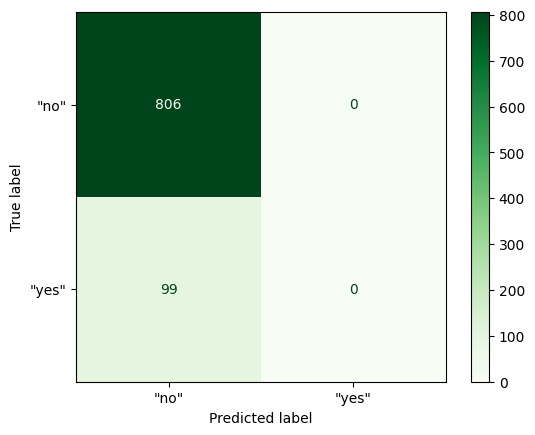

In [17]:
y_prediction = model.predict(X_test)
cm = confusion_matrix(y_test, y_prediction, labels = model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = model.classes_)
disp.plot(cmap = 'Greens')
plt.show()

### The model achieves an accuracy of approximately 87.6% on the test set. This suggests that the model is able to correctly classify the outcomes ('yes' or 'no') for a significant majority of the cases based on the 'age' and 'balance' features.

### The intercept −2.53453177 represents the log odds of the outcome being 'yes' when all predictors (age and balance) are zero

### The coefficient for Age is 1.10233151e-02. Although it is small, it is positive, suggesting that older individuals are slightly more likely to say 'yes' to the bank term deposit.

### The coefficient for Balance is 1.02266063e-05. Although it is small, it is positive, suggesting that as the balance increases, the log odds of the outcome being 'yes' increase.